# Evaluating classification model

## Overview of model evaluation

    - When we need to select different model types, tuning parameters, and features

### Basic Concepts 


#### Model evaluation procedures

The procedure (steps) to evaluate how well a model will generalize to out-of-sample data 

1. **Training and testing on the same data**
     - the worst case! If you have enough data - never train and test on same data.
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data    
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together    
    - Runs "K" times slower than train/test split, but more accurate.

#### Model evaluation metric (Loss Function)

A metric to evaluate how well specific algorithm models the given data ( how well the algorithm fits the data ). 

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Loss function

In order to evaluate how well a function fits the training data (i.e. how well specific algorithm models the given data), the *loss* function is defined as:

$L: \hat{Y} \times Y \to \Bbb{R} ^{\ge 0}$, where 

<div style="margin-left:1em">

$Y$ - the set of [ground truth](https://en.wikipedia.org/wiki/Ground_truth) values for given input data

$\hat{Y}$ - the set of predicted values

$\Bbb{R}$ - the set of real numbers
</div>
		
I.e. if we have the training samples ${(x_{i},\;y_{i})}$, then the the loss of predicting the value ${{\hat {y}}}$ is ${L(y_i,\hat{y})}$.

Usually, in the same context, is used the term *cost* function, which can be regarded as a generalization of the lost function.

**There’s no one-size-fits-all loss function to algorithms in machine learning.**

Generally, loss functions can be classified into two major categories depending upon the type of learning task we are dealing with: Regression losses and Classification losses.

### Regression Losses

*Note that scikit-learn implements a good quantity of regression metrics: [Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)*

If you want to read more, check: [alt](https://medium.com/analytics-vidhya/a-comprehensive-guide-to-loss-functions-part-1-regression-ff8b847675d6)


Next notation will be used notes bellow:

$n$        - Number of training examples.
	
$i$        - $i$ th training example in a data set.

$y_{i}$     - Ground truth label for ith training example.
	
$\hat y_{i}$- Prediction for ith training example (y_hat(i))

#### Mean square error (MSE)

Mean square error is measured as the average of squared difference between predictions and actual observations.

${MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2} $

Due to squaring, **MSE "punishes" bigger errors**, which is quite useful in the real world



In [30]:
# Calculating MSE with Python and numpy:

import numpy as np

def calc_mse(Y_pred, Y_true):
	differences_squared = (Y_pred - Y_true) ** 2
	mean_of_differences_squared = differences_squared.mean()

	return mean_of_differences_squared

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

mse = calc_mse(Y_pred, Y_true)

print(f'MSE = {mse:.5f}')

MSE = 0.14790


In [31]:
# Calculating MSE with Scikit-learn:

from sklearn.metrics import mean_squared_error

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(Y_true,Y_pred,squared=True)
print(f'MSE = {mse:.5f}')


MSE = 0.14790


/media/nemsys/data/projects/courses/common/JupyterNotebooksExamples/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Root Mean Squared Error

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

RMSE is easilly interpretable in the "y" units.

In [32]:
# Calculating RMSE with Python and numpy:

import numpy as np

def calc_rmse(Y_pred, Y_true):
	differences_squared = (Y_pred - Y_true) ** 2
	mean_of_differences_squared = differences_squared.mean()
	root_mean_of_differences_squared = np.sqrt(mean_of_differences_squared)

	return root_mean_of_differences_squared

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

rmse = calc_rmse(Y_pred, Y_true)

print(f'RMSE = {rmse:.5f}')

RMSE = 0.38458


In [33]:
# Calculating RMSE with Scikit-learn:

from sklearn.metrics import mean_squared_error

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_true,Y_pred,squared=False)
print(f'RMSE = {rmse:.5f}')


RMSE = 0.38458


/media/nemsys/data/projects/courses/common/JupyterNotebooksExamples/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Classification accuracy

[Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository

In [34]:
# read the data into a pandas DataFrame
import pandas as pd

path = '../../datasets/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load the CSV, skipping the first row (which is the header in the file)
pima = pd.read_csv(path, names=col_names, skiprows=1)

# Convert all columns to numeric (this will coerce invalid values to NaN)
pima = pima.apply(pd.to_numeric, errors='coerce')

In [35]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [37]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [38]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [40]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [41]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [42]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

label
0    130
1     62
Name: count, dtype: int64

In [43]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [44]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [45]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [46]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

label
0    0.677083
Name: count, dtype: float64

Comparing the **true** and **predicted** response values

In [47]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# IMPORTANT: first argument is true values, second argument is predicted values
cm = confusion_matrix(y_test, y_pred_class)

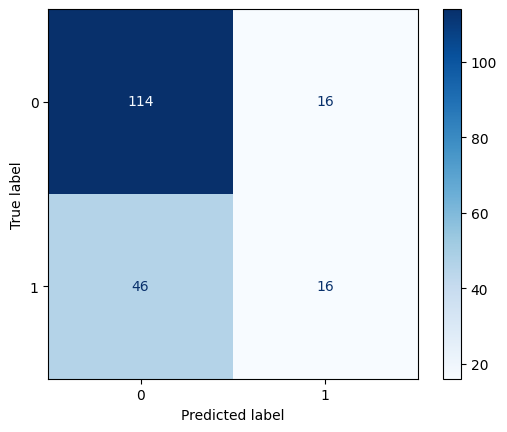

In [68]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

**Basic terminology**

- **True Positives (TP):** we *correctly* the Positive Class
- **True Negatives (TN):** we *correctly* the Negative Class
- **False Positives (FP):** we *incorrectly* the Positive Class (a "Type I error")
- **False Negatives (FN):** we *incorrectly* the Negative Class (a "Type II error")

In [49]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [70]:
# slice into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print('TP: ', TP)
print('TN: ', TN)
print('FP: ', FP)
print('FN: ', FN)

TP:  16
TN:  114
FP:  16
FN:  46


## Metrics computed from a confusion matrix

![alt](./../../images/Confusion-matrix-and-Metrics.png)

**Classification Accuracy:** Overall, how often is the classifier correct?

In [51]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [52]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3229166666666667
0.32291666666666663


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [53]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [54]:
print(TN / float(TN + FP))

0.8769230769230769


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [55]:
print(FP / float(TN + FP))

0.12307692307692308


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [56]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold

In [57]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [58]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [59]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [60]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [61]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

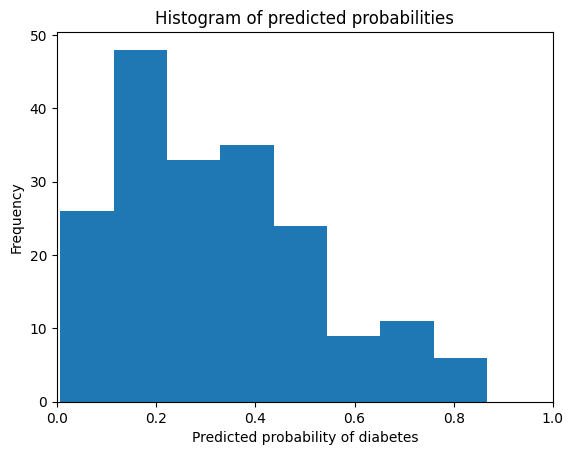

In [62]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [63]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

TypeError: too many positional arguments

In [31]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [32]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [33]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [34]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [35]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [36]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

## ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

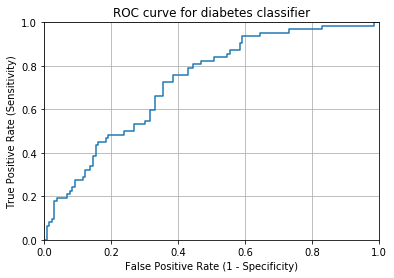

In [37]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [38]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [39]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [40]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [41]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [42]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**

## Confusion Matrix Resources

- Blog post: [Simple guide to confusion matrix terminology](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by me
- Videos: [Intuitive sensitivity and specificity](https://www.youtube.com/watch?v=U4_3fditnWg) (9 minutes) and [The tradeoff between sensitivity and specificity](https://www.youtube.com/watch?v=vtYDyGGeQyo) (13 minutes) by Rahul Patwari
- Notebook: [How to calculate "expected value"](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb) from a confusion matrix by treating it as a cost-benefit matrix (by Ed Podojil)
- Graphic: How [classification threshold](https://media.amazonwebservices.com/blog/2015/ml_adjust_model_1.png) affects different evaluation metrics (from a [blog post](https://aws.amazon.com/blogs/aws/amazon-machine-learning-make-data-driven-decisions-at-scale/) about Amazon Machine Learning)


## ROC and AUC Resources

- Video: [ROC Curves and Area Under the Curve](https://www.youtube.com/watch?v=OAl6eAyP-yo) (14 minutes) by me, including [transcript and screenshots](http://www.dataschool.io/roc-curves-and-auc-explained/) and a [visualization](http://www.navan.name/roc/)
- Video: [ROC Curves](https://www.youtube.com/watch?v=21Igj5Pr6u4) (12 minutes) by Rahul Patwari
- Paper: [An introduction to ROC analysis](http://people.inf.elte.hu/kiss/13dwhdm/roc.pdf) by Tom Fawcett
- Usage examples: [Comparing different feature sets](http://research.microsoft.com/pubs/205472/aisec10-leontjeva.pdf) for detecting fraudulent Skype users, and [comparing different classifiers](http://www.cse.ust.hk/nevinZhangGroup/readings/yi/Bradley_PR97.pdf) on a number of popular datasets

## Other Resources

- scikit-learn documentation: [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- Guide: [Comparing model evaluation procedures and metrics](https://github.com/justmarkham/DAT8/blob/master/other/model_evaluation_comparison.md) by me
- Video: [Counterfactual evaluation of machine learning models](https://www.youtube.com/watch?v=QWCSxAKR-h0) (45 minutes) about how Stripe evaluates its fraud detection model, including [slides](http://www.slideshare.net/MichaelManapat/counterfactual-evaluation-of-machine-learning-models)

## Comments or Questions?

- Email: <kevin@dataschool.io>
- Website: http://dataschool.io
- Twitter: [@justmarkham](https://twitter.com/justmarkham)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()